In [1]:
import os
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import awswrangler as wr

In [2]:
import utils, preprocessing

In [3]:
path_prefix = 's3://think-tank-casestudy/preprocessed_data'

In [4]:
train_data = wr.s3.read_parquet(f'{path_prefix}/train_data_clustered.parquet')

In [5]:
test_data = wr.s3.read_parquet(f'{path_prefix}/test_data_clustered.parquet')

In [6]:
train_data.groupby('ORIGIN_STAND', 
                   as_index=False)[['TOTAL_FLIGHT_TIME_MINUTES', 
                'TOTAL_DISTANCE_KM']].agg(['mean', 'median','std','max','min'])

TOTAL_FLIGHT_TIME_MINUTES                                \
                                  mean median       std    max   min   
ORIGIN_STAND                                                           
1.0                           9.513317   9.00  4.055926  20.50  2.25   
2.0                           9.566489   8.75  4.496830  20.50  2.25   
3.0                           9.542165   8.75  4.060391  20.50  2.25   
4.0                          10.078436   9.75  3.966775  20.50  2.25   
5.0                           8.121795   8.25  3.075194  17.75  2.75   
...                                ...    ...       ...    ...   ...   
59.0                         11.635677  11.50  3.823871  20.50  2.25   
60.0                          8.605748   8.00  3.907847  20.50  2.25   
61.0                          8.939262   8.25  4.026630  20.50  2.25   
62.0                          8.103208   7.00  4.131335  20.50  2.25   
63.0                          9.070925   8.25  3.778756  20.50  2.25   

             TOTAL_DISTANCE_KM                                          
                          mean    median       std       max       min  
ORIGIN_STAND                                                            
1.0                   3.133964  3.020737  1.619171  8.179978  0.004465  
2.0                   2.258462  1.819555  1.691297  8.159988  0.000990  
3.0                   3.781689  3.280929  1.930065  8.159196  0.005004  
4.0                   2.632164  1.961713  1.716968  8.166468  0.048225  
5.0                   3.603324  3.326837  2.045915  7.885870  0.774378  
...                        ...       ...       ...       ...       ...  
59.0                  3.803987  3.710210  1.479838  8.190655  0.002217  
60.0                  2.880432  2.409767  1.805230  8.189453  0.001979  
61.0                  2.864591  2.517841  1.651406  8.184955  0.000000  
62.0                  2.767747  2.369340  1.567340  8.076172  0.005381  
63.0                  2.305258  1.814040  1.407915  8.188918  0.000000  

[63 rows x 10 columns]

In [7]:
train_data.groupby('CALL_TYPE', 
                   as_index=False)[['TOTAL_FLIGHT_TIME_MINUTES', 
                'TOTAL_DISTANCE_KM']].agg(['mean', 'median','std','max','min'])

TOTAL_FLIGHT_TIME_MINUTES                               \
                               mean median       std   max   min   
CALL_TYPE                                                          
A                         10.456125   10.0  4.190134  20.5  2.25   
B                          9.611950    9.0  3.987264  20.5  2.25   
C                          9.566785    9.0  4.197024  20.5  2.25   

          TOTAL_DISTANCE_KM                                     
                       mean    median       std       max  min  
CALL_TYPE                                                       
A                  3.158785  2.845536  1.855836  8.191437  0.0  
B                  3.108261  2.767805  1.747787  8.191326  0.0  
C                  3.171706  2.805640  1.924201  8.191482  0.0

In [8]:
train_data.groupby('WEATHER', as_index=False)[['TOTAL_FLIGHT_TIME_MINUTES', 'TOTAL_DISTANCE_KM']]\
.agg(['mean', 'median','std','max','min'])

TOTAL_FLIGHT_TIME_MINUTES                               \
                             mean median       std   max   min   
WEATHER                                                          
Cloudy                   9.789449   9.25  4.102885  20.5  2.25   
Foggy                    9.770298   9.25  4.100735  20.5  2.25   
Rainy                    9.787381   9.25  4.106448  20.5  2.25   
Sunny                    9.779296   9.25  4.110415  20.5  2.25   
Windy                    9.790107   9.25  4.106708  20.5  2.25   

        TOTAL_DISTANCE_KM                                     
                     mean    median       std       max  min  
WEATHER                                                       
Cloudy           3.138360  2.794055  1.823215  8.191454  0.0  
Foggy            3.135225  2.793019  1.821891  8.191482  0.0  
Rainy            3.131932  2.789794  1.815255  8.191218  0.0  
Sunny            3.136941  2.792271  1.822470  8.191316  0.0  
Windy            3.140490  2.799794  1.823973  8.191463  0.0

/var/folders/98/blj_ctsx7kj90yq1wpxpkthh0000gn/T/ipykernel_21499/679434745.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


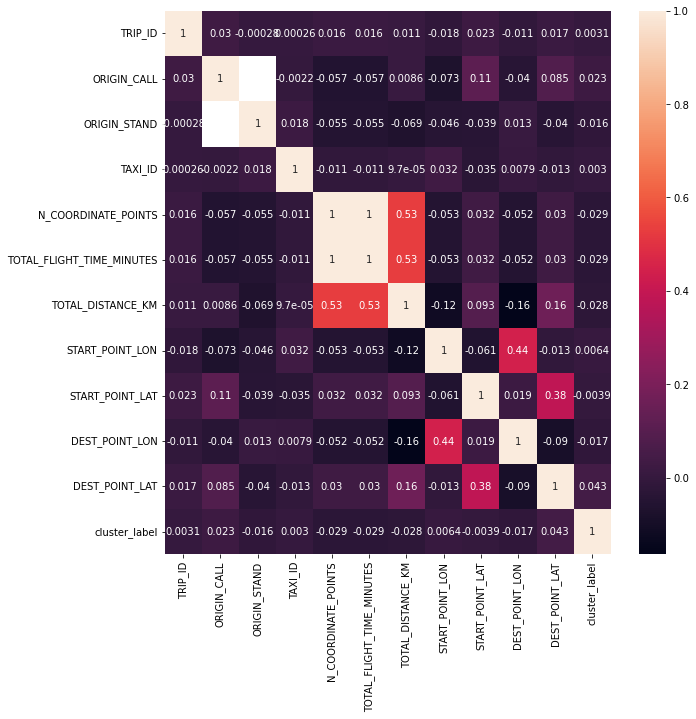

In [9]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [10]:
train_data = utils.extend_timestamps(train_data)
test_data = utils.extend_timestamps(test_data)

In [11]:
vc_year_month = train_data.YEAR_MONTH.value_counts().sort_index()

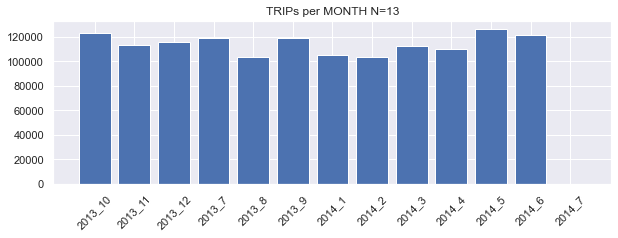

In [12]:
sns.set()
plt.figure(figsize=(10,3))
plt.bar(vc_year_month.index, vc_year_month.values,label='Unique TRIPs per Month')
plt.xticks(vc_year_month.index, rotation=45)
plt.title(f'TRIPs per MONTH N={vc_year_month.shape[0]}')
plt.show()

(-8.7, -8.5)

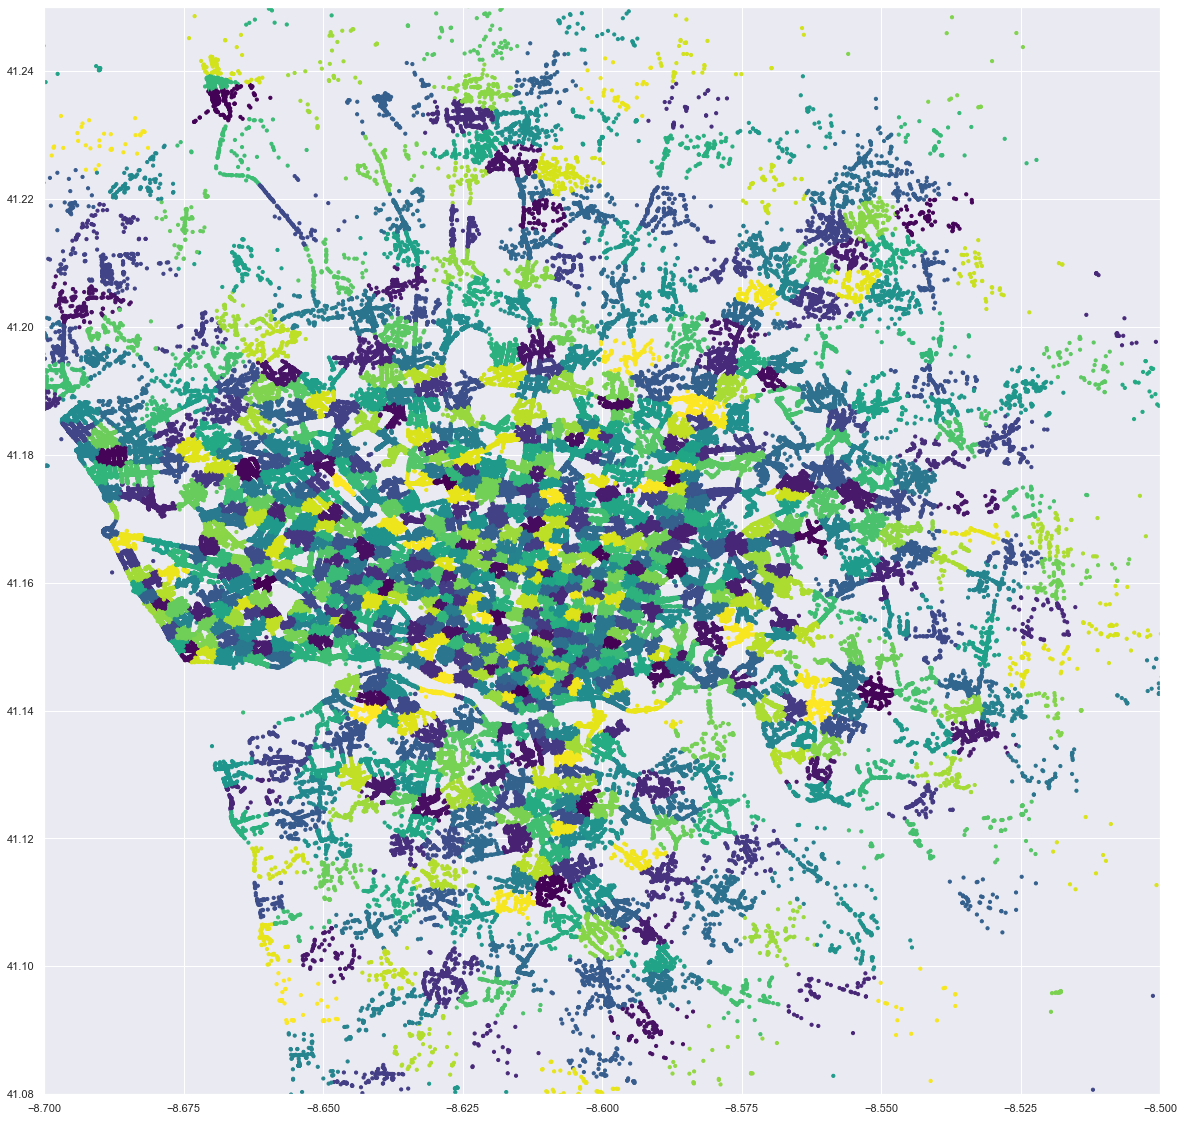

In [16]:
plt.figure(figsize=(20,20))
plt.scatter(train_data.DEST_POINT_LON, 
                        train_data.DEST_POINT_LAT,
            c=train_data.cluster_label, s=10,cmap='viridis')
plt.ylim([41.08,41.25])
plt.xlim([-8.7,-8.5])

In [15]:
train_data = preprocessing.split_lat_lon(train_data)

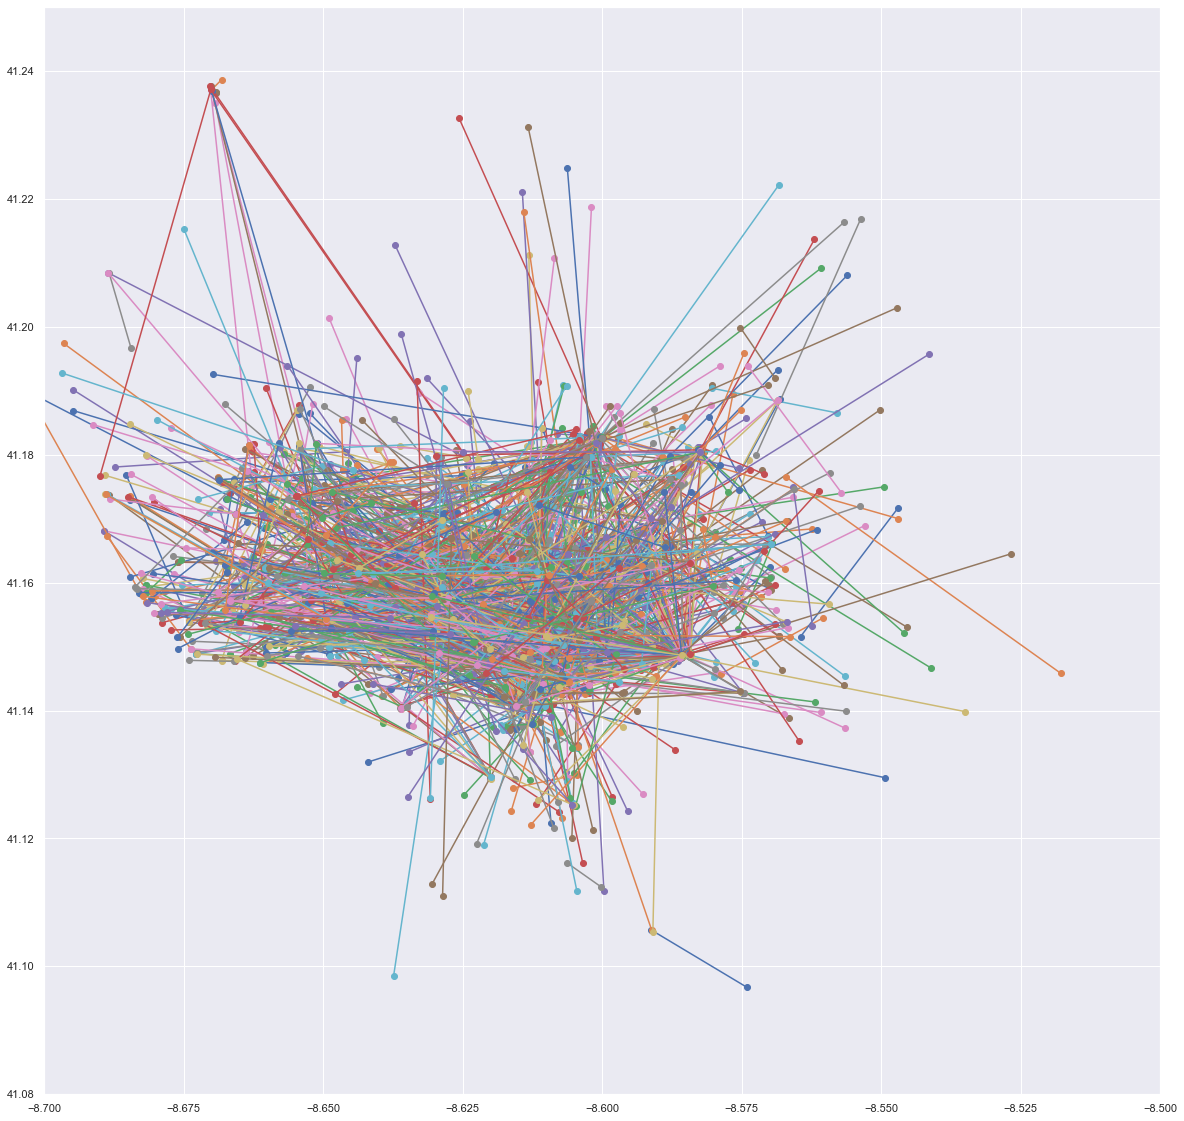

In [67]:
plt.figure(figsize=(20,20))
plt.ylim([41.08,41.25])
plt.xlim([-8.7,-8.5])
for index,row in train_data.iterrows():
    route = pd.DataFrame({'LON': [row.START_POINT_LON,row.DEST_POINT_LON],
                          'LAT': [row.START_POINT_LAT,row.DEST_POINT_LAT]})
    
    
    plt.plot(route.LON,route.LAT, '-o')
    if index == 2000:
        break
plt.show()

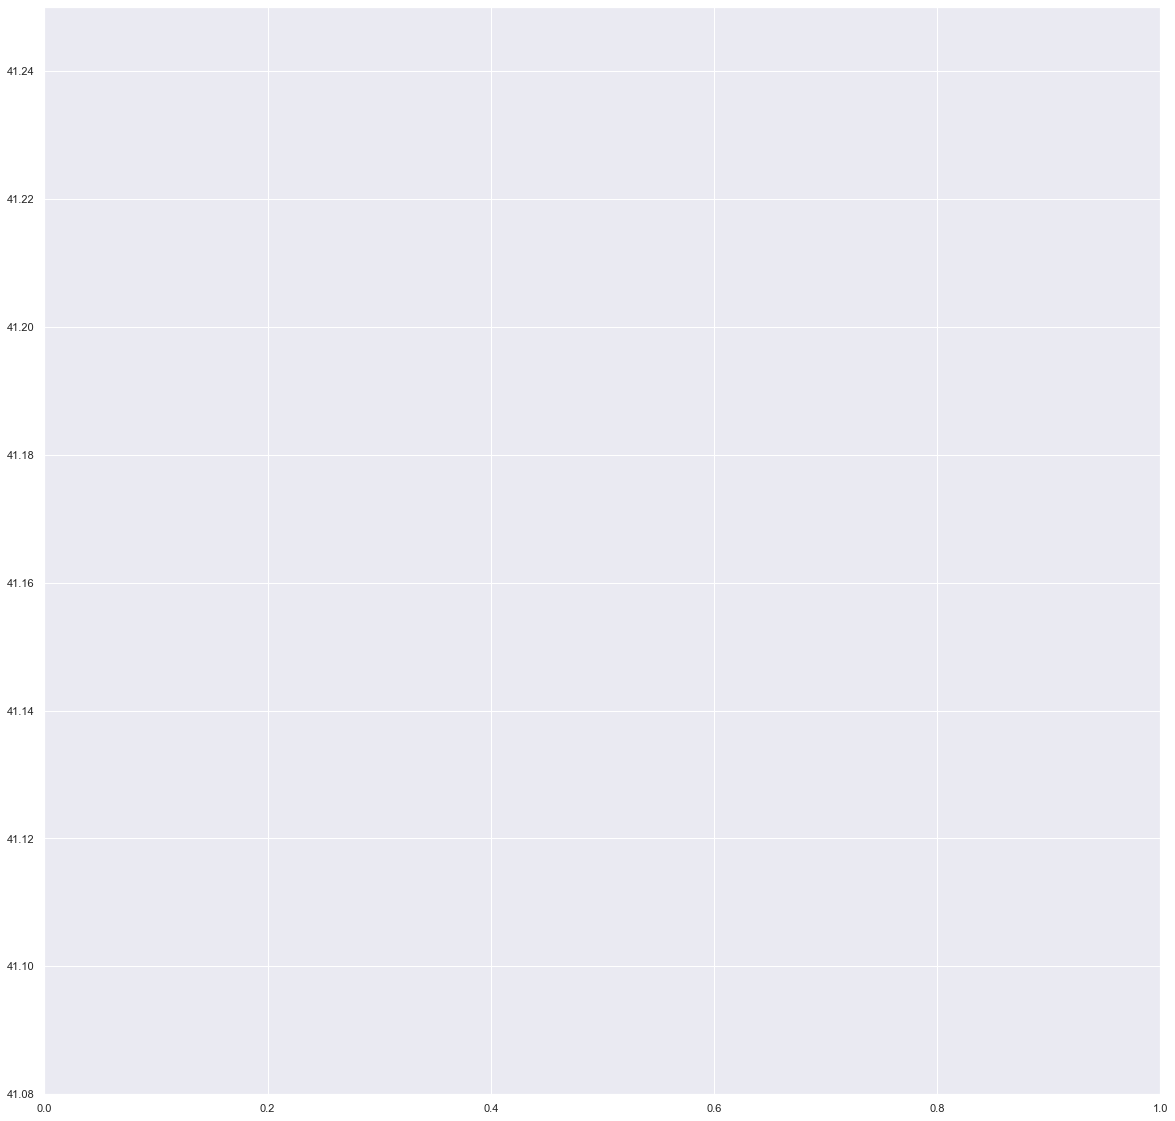

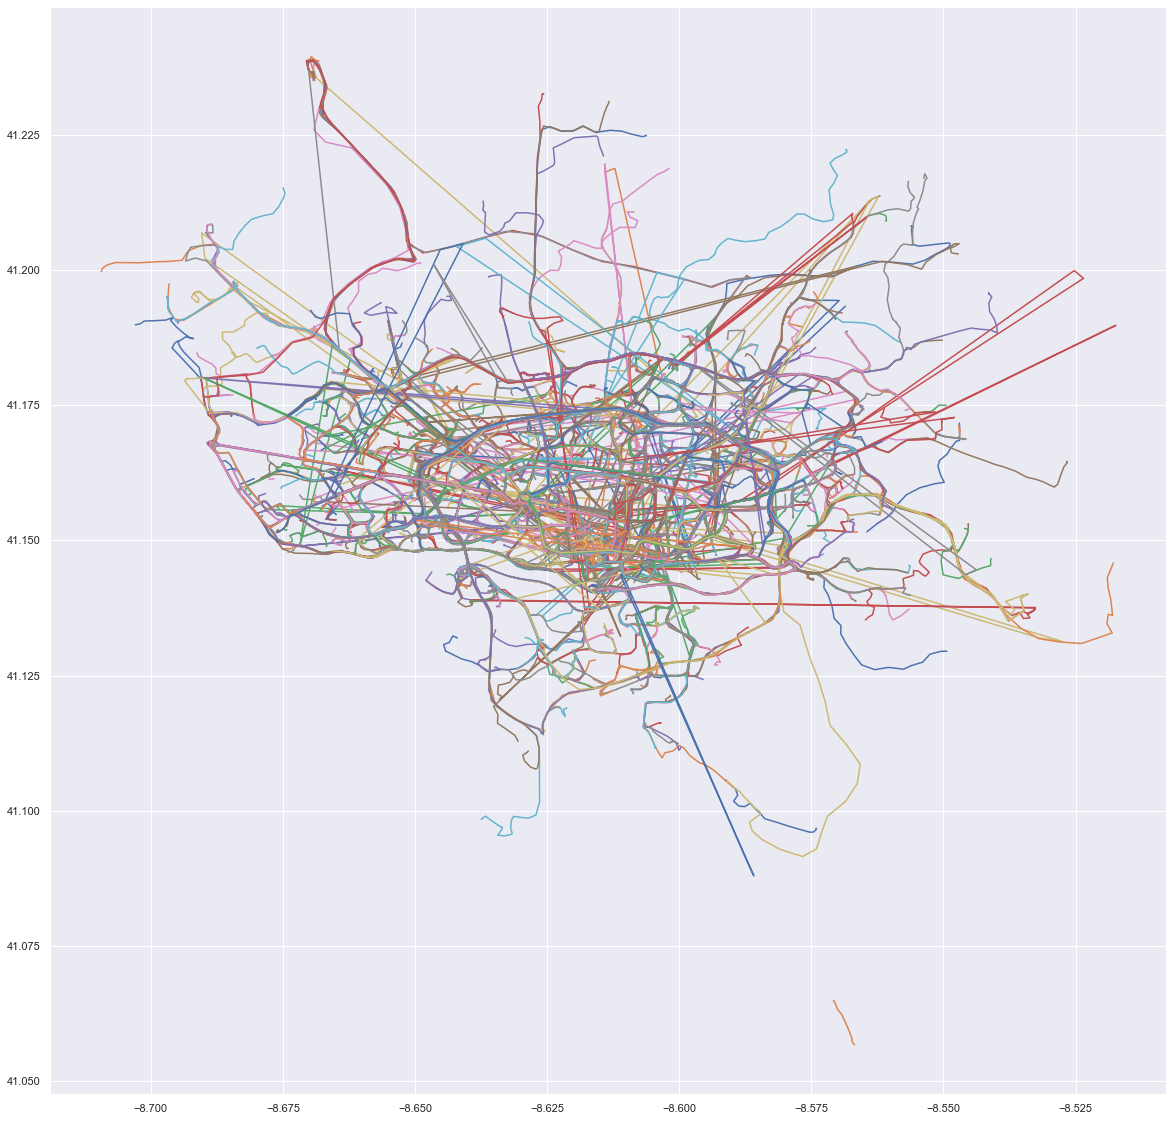

In [68]:
plt.figure(figsize=(20,20))
plt.ylim([41.08,41.25])
plt.figure(figsize=(20,20))

for index,row in train_data.iterrows():
    route = pd.DataFrame({'LON': train_data.LON_ARRAY[index],
                  'LAT': train_data.LAT_ARRA[index]})
    plt.plot(route.LON,route.LAT)
    if index == 2000:
        break
plt.show()